In [36]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import log_reg as lr
import ann
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mnist_dataset/train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
X = df[['pixel{}'.format(i) for i in range(784)]].values.astype(np.float32)
mu = X.mean(axis=0)
std = X.std(axis=0)
np.place(std, std == 0, 1)
X_train, X_test, y_train, y_test = train_test_split((X-mu)/std, 
                                                    df['label'].values.astype(np.int32), test_size=0.2, random_state=42)

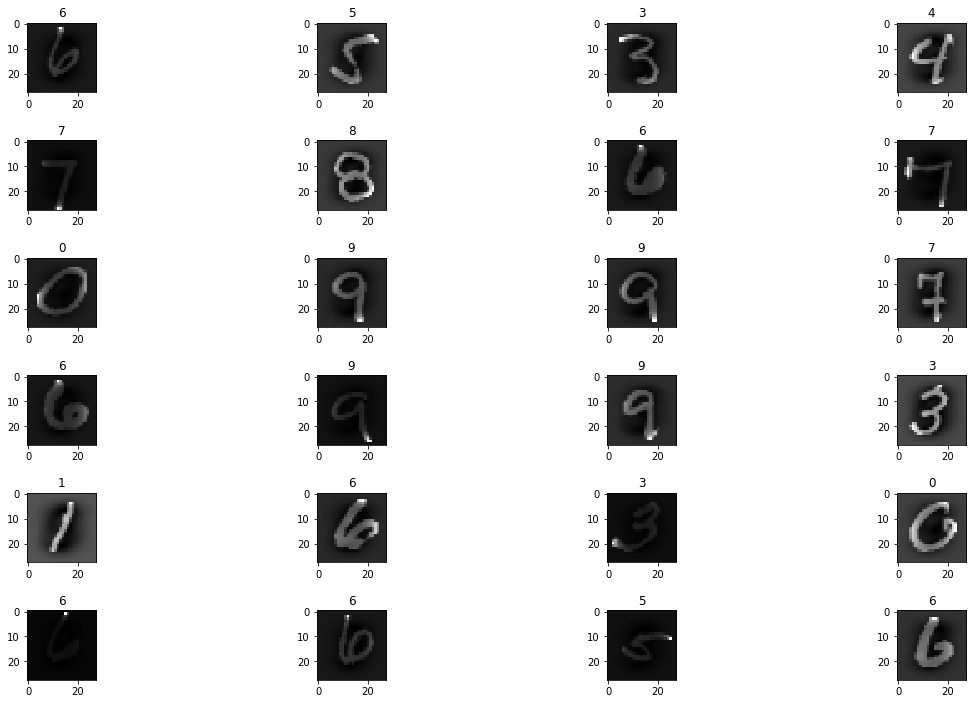

In [111]:
imageside = 28
cols = 4
rows = 6
f, axarr = plt.subplots(rows,cols,figsize=(18,10))
for i in range(rows):
    for j in range(cols):
        axarr[i,j].imshow(X_train[cols*i+j].reshape(imageside,imageside), cmap='gray')
        axarr[i,j].set_title(y_train[cols*i+j])

f.tight_layout(pad=1.5)

In [17]:
logreg = lr.MulticlassLogisticRegression(num_epochs=1000, print_epoch=100, learning_rate=5e-4)
logreg.fit(X_train, y_train)

cost:  306905.6959783495 accuracy:  0.08288690476190476
cost:  32339.414248245906 accuracy:  0.8845238095238095
cost:  24311.235959206406 accuracy:  0.9053571428571429
cost:  20886.319017016558 accuracy:  0.9202083333333333
cost:  19547.343653302745 accuracy:  0.9237797619047619
cost:  20294.68440031517 accuracy:  0.9220238095238096
cost:  21374.295347683586 accuracy:  0.9200297619047619
cost:  17613.884490549128 accuracy:  0.9287202380952381
cost:  17835.584144502725 accuracy:  0.9279166666666666
cost:  18451.398053290544 accuracy:  0.9239880952380952


In [18]:
min(logreg.costs)#lowest cost

16425.66081006546

In [19]:
print("Model accuracy on training set: {}\n".format(round(logreg.score(y_train, logreg.predict_proba(X_train)),4))+
      "Model accuracy on test set: {}".format(logreg.score(y_test, logreg.predict_proba(X_test))))

Model accuracy on training set: 0.9272
Model accuracy on test set: 0.9138095238095238


Now with PCA:

In [77]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

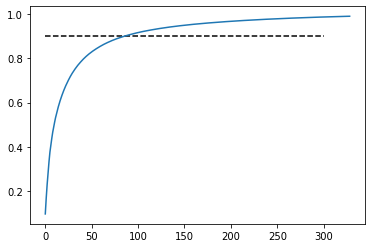

In [110]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.hlines(0.90,0,300,linestyles='--')
plt.show()

In [90]:
n_features = list(np.cumsum(pca.explained_variance_ratio_)>0.99)\
    .index(True)#number of features to get 99% variance

In [92]:
pca = PCA(n_components=n_features,random_state=42)
logreg = lr.MulticlassLogisticRegression(num_epochs=1000, print_epoch=100, learning_rate=5e-4)

In [96]:
pipe = Pipeline([("pca", pca),
                 ("logreg", logreg)])
pipe.fit(X_train, y_train)

cost:  280131.62828864774 accuracy:  0.10288690476190476
cost:  11572.800992040988 accuracy:  0.9099702380952381
cost:  9854.095109680204 accuracy:  0.9168452380952381
cost:  8734.42555521692 accuracy:  0.927797619047619
cost:  9108.982057053561 accuracy:  0.9224404761904762
cost:  8041.864259221479 accuracy:  0.9321428571428572
cost:  15357.845329823343 accuracy:  0.8703869047619047
cost:  7798.5890538605145 accuracy:  0.9345535714285714
cost:  7593.660905393331 accuracy:  0.9363690476190476
cost:  8807.409834038206 accuracy:  0.9198214285714286


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=329,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logreg',
                 <log_reg.MulticlassLogisticRegression object at 0x7f1cf7eed5d0>)],
         verbose=False)

In [102]:
print("Model accuracy on training set: {}\n".format(round(pipe.steps[1][1].score(y_train, pipe.predict_proba(X_train)),4))+
      "Model accuracy on test set: {}".format(pipe.steps[1][1].score(y_test, pipe.predict_proba(X_test))))

Model accuracy on training set: 0.9297
Model accuracy on test set: 0.9067857142857143


Logistic regression with batch gradient descent (10 batches) - no PCA:

In [23]:
logreg = lr.MulticlassLogisticRegression(num_epochs=100, print_epoch=10, learning_rate=2e-4, gd_type='batch')
logreg.fit(X_train, y_train)

cost:  305962.54547604144 accuracy:  0.07217261904761904
cost:  152606.07170322468 accuracy:  0.3011309523809524
cost:  99835.81248417712 accuracy:  0.48538690476190477
cost:  77148.66349173624 accuracy:  0.5754166666666667
cost:  64204.545105171834 accuracy:  0.6302083333333334
cost:  55846.05562186662 accuracy:  0.668422619047619
cost:  50044.529581710805 accuracy:  0.6972619047619047
cost:  45712.41414759238 accuracy:  0.7191666666666666
cost:  42440.892034403645 accuracy:  0.7341369047619047
cost:  39792.872714378645 accuracy:  0.7489285714285714
cost:  37703.27918443384 accuracy:  0.7620238095238095
cost:  35887.31460031661 accuracy:  0.7708333333333334
cost:  34393.56353800194 accuracy:  0.7788690476190476
cost:  33045.148062988854 accuracy:  0.7864285714285715
cost:  31924.87091558418 accuracy:  0.7924404761904762
cost:  30884.97772897636 accuracy:  0.7968452380952381
cost:  29981.545380365482 accuracy:  0.8027083333333334
cost:  29187.38851961286 accuracy:  0.8071130952380953
c

In [24]:
min(logreg.costs)#lowest cost

14707.447123468753

In [26]:
print("Model accuracy on training set: {}\n".format(round(logreg.score(y_train, logreg.predict_proba(X_train)),4))+
      "Model accuracy on test set: {}".format(logreg.score(y_test, logreg.predict_proba(X_test))))

Model accuracy on training set: 0.8883
Model accuracy on test set: 0.8786904761904762


Now we check the performance of an ANN with a sigmoid activation function:

In [106]:
nn = ann.ANNClassifier(hidden_layers_dims=[300],
                       activation='sigmoid',
                       num_epochs=20,
                       print_epoch=5,
                       learning_rate=1e-5,
                       gd_type='batch',
                       batch_number=40,
                       eps=0,
                       regularization = 0.01)
nn.fit(X_train, y_train)

cost:  83353.88199343924 accuracy:  0.095625
cost:  77364.78656490288 accuracy:  0.18041666666666667
cost:  82329.76744731491 accuracy:  0.10160714285714285
cost:  76842.05938478374 accuracy:  0.22005952380952382
cost:  73474.49588029567 accuracy:  0.1938690476190476
cost:  75449.84696378066 accuracy:  0.17875
cost:  65711.08267828502 accuracy:  0.4675
cost:  66896.32705691879 accuracy:  0.3358035714285714
cost:  62497.6161632431 accuracy:  0.41660714285714284
cost:  53282.28762313655 accuracy:  0.6543154761904761
cost:  53336.338215194555 accuracy:  0.5414880952380953
cost:  46937.88947890296 accuracy:  0.5458630952380953
cost:  38401.140987740684 accuracy:  0.7181547619047619
cost:  39158.36614066951 accuracy:  0.6386309523809524
cost:  34133.85024000931 accuracy:  0.7069345238095238
cost:  27522.970882737023 accuracy:  0.7890178571428571
cost:  25826.492605844276 accuracy:  0.7730654761904762
cost:  25905.46872102143 accuracy:  0.763125
cost:  23900.101909499648 accuracy:  0.7942261

cost:  8648.181192120977 accuracy:  0.9333035714285715
cost:  8457.743530319936 accuracy:  0.9350595238095238
cost:  8250.19143712904 accuracy:  0.936875
cost:  8059.722764628137 accuracy:  0.93875
cost:  7926.126796728563 accuracy:  0.939672619047619
cost:  7865.915462653137 accuracy:  0.9398511904761905
cost:  7876.756993674899 accuracy:  0.9398809523809524
cost:  7950.695971975542 accuracy:  0.9388392857142858
cost:  8056.735914758846 accuracy:  0.9372916666666666
cost:  8161.0307571734675 accuracy:  0.9357440476190476


In [107]:
print("Model accuracy on training set: {}\n".format(round(nn.score(y_train, nn.predict_proba(X_train)),4))+
      "Model accuracy on test set: {}".format(nn.score(y_test, nn.predict_proba(X_test))))

Model accuracy on training set: 0.9347
Model accuracy on test set: 0.9266666666666666


In [108]:
min(nn.costs)#lowest cost

7861.544489971272

In [166]:
import importlib
importlib.reload(ann)

<module 'ann' from '/home/caio/Desktop/dsutils/DeepLearning/ann.py'>

In [236]:
nn = ann.ANNClassifier(hidden_layers_dims=[300],
                       activation='sigmoid',
                       num_epochs=20,
                       print_epoch=20,
                       learning_rate=1e-6,
                       gd_type='batch',
                       batch_number=40,
                       eps=1e-8, #guarantees cost doesn't explode due to log of zero
                       regularization = 0.01, 
                       mu=0.001 #if I choose high momentum parameter weights quickly explode
                      )
nn.fit(X_train, y_train)

cost:  84399.4524328287 accuracy:  0.12705357142857143
cost:  74834.75594024752 accuracy:  0.19958333333333333
cost:  72622.58397088492 accuracy:  0.2849107142857143
cost:  53897.71929221719 accuracy:  0.7170833333333333
cost:  48386.19665786601 accuracy:  0.5312202380952381
cost:  32650.18432143289 accuracy:  0.7752380952380953
cost:  28735.56867830865 accuracy:  0.7642559523809523
cost:  24022.10942373233 accuracy:  0.7948214285714286
cost:  19371.392799568694 accuracy:  0.8145238095238095
cost:  18874.916784234276 accuracy:  0.8161309523809523
cost:  18369.70941682426 accuracy:  0.8253869047619048
cost:  18276.064769330354 accuracy:  0.8335714285714285
cost:  18108.981981495745 accuracy:  0.8449702380952381
cost:  16883.388696935424 accuracy:  0.8636904761904762
cost:  16434.431911609314 accuracy:  0.8707440476190477
cost:  17056.554387918328 accuracy:  0.8719345238095239
cost:  18070.33944694215 accuracy:  0.8691964285714285
cost:  18492.72938984065 accuracy:  0.8720238095238095
co

In [237]:
costs1 = nn.costs

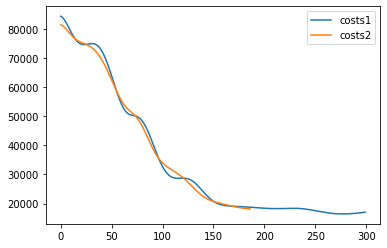

In [240]:
plt.plot(costs1[:300]) #with momentum
plt.plot(costs2[:300]) #no momentum
plt.legend(['costs1','costs2'])

In [241]:
print("Model accuracy on training set: {}\n".format(round(nn.score(y_train, nn.predict_proba(X_train)),4))+
      "Model accuracy on test set: {}".format(nn.score(y_test, nn.predict_proba(X_test))))

Model accuracy on training set: 0.9193
Model accuracy on test set: 0.911547619047619
